# Moist Eddy Growth Rates in a 2-Layer QG Model

This notebook computes and plots moist eddy growth rates using a 3x3
complex generalized eigenvalue problem. The latent heating parameter $L$
controls the degree of moisture feedback.

We compare dry ($L=0$), moderately moist ($L=0.15$), and strongly moist ($L=0.5$) cases.

In [1]:
# Author: Giorgio M. Sarro (UChicago)
import numpy as np
import matplotlib.pyplot as plt
import qg_eddy_growth.moist_growth

# Model parameters
U1, U2 = 1.0, 0.4

# Compute growth rates for three moisture levels
kk, growth_dry, q1_dry, q2_dry, P_dry = qg_eddy_growth.moist_growth.moist_matrix(
    L=0.0, U1=U1, U2=U2,
)
kk, growth_mid, q1_mid, q2_mid, P_mid = qg_eddy_growth.moist_growth.moist_matrix(
    L=0.15, U1=U1, U2=U2,
)
kk, growth_moist, q1_moist, q2_moist, P_moist = qg_eddy_growth.moist_growth.moist_matrix(
    L=0.5, U1=U1, U2=U2,
)

print(f'Peak dry growth:   {np.max(growth_dry):.4f}')
print(f'Peak moist (0.15): {np.max(growth_mid):.4f}')
print(f'Peak moist (0.50): {np.max(growth_moist):.4f}')

Peak dry growth:   0.1600
Peak moist (0.15): 0.2136
Peak moist (0.50): 0.3153


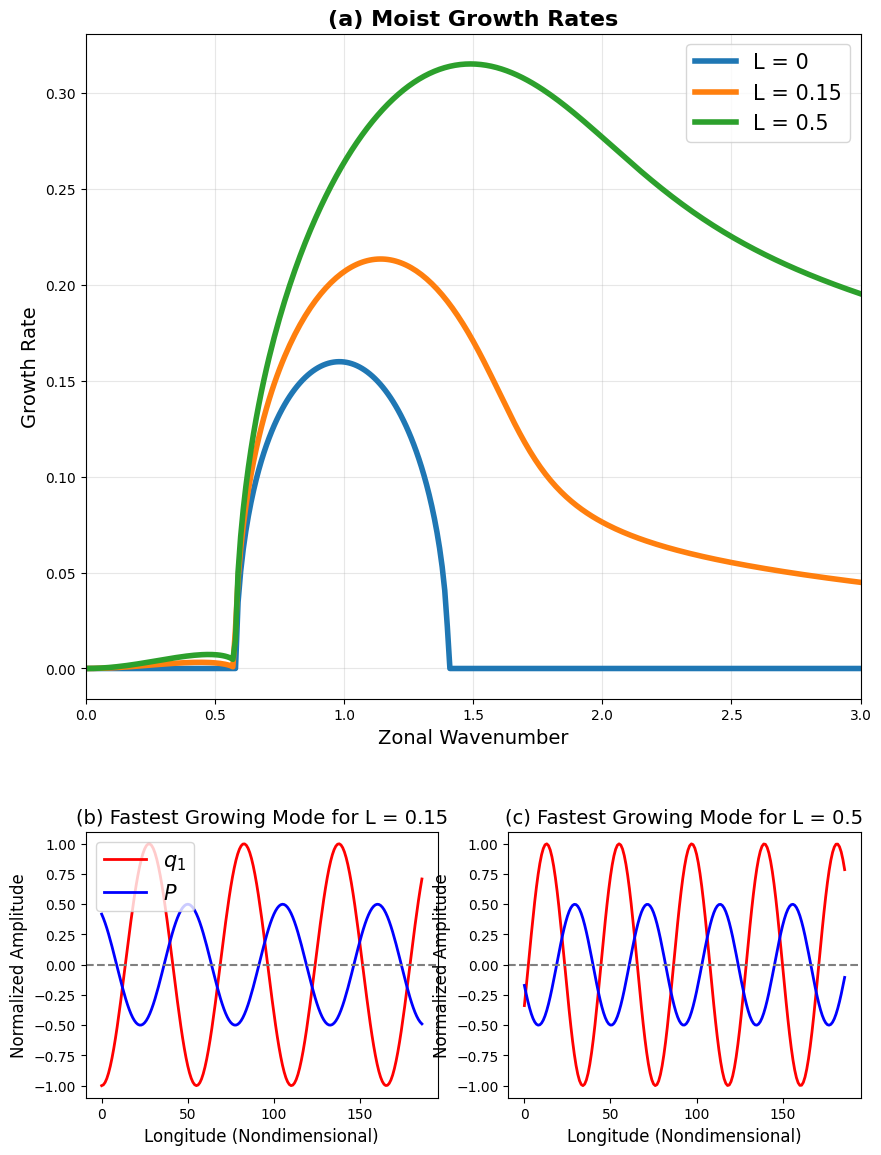

In [2]:
fig = plt.figure(figsize=(10, 19))
grid = plt.GridSpec(4, 2, hspace=0.5, wspace=0.2)

# (a) Growth rate comparison
ax_main = fig.add_subplot(grid[:2, :])
ax_main.plot(kk, growth_dry, linestyle='-', label='L = 0', linewidth=4)
ax_main.plot(kk, growth_mid, linestyle='-', label='L = 0.15', linewidth=4)
ax_main.plot(kk, growth_moist, linestyle='-', label='L = 0.5', linewidth=4)
ax_main.set_title('(a) Moist Growth Rates', fontsize=16, fontweight='bold')
ax_main.legend(fontsize=15)
ax_main.grid(True, alpha=0.3)
ax_main.set_xlabel('Zonal Wavenumber', fontsize=14)
ax_main.set_ylabel('Growth Rate', fontsize=14)
ax_main.set_xlim(0, 3)

# (b, c) Fastest growing mode structure
titles = [
    '(b) Fastest Growing Mode for L = 0.15',
    '(c) Fastest Growing Mode for L = 0.5',
]
mode_labels = ['mid', 'moist']
q1_fields = [q1_mid, q1_moist]
P_fields = [P_mid, P_moist]

for i, (title, q1_f, P_f) in enumerate(zip(titles, q1_fields, P_fields)):
    P_trim = P_f[1:-1]
    q1_trim = q1_f[1:-1]
    ax = fig.add_subplot(grid[2 + i // 2, i % 2])
    ax.plot(q1_trim / np.max(np.abs(q1_trim)), label='$q_1$', color='red', linewidth=2)
    ax.plot(P_trim / np.max(np.abs(P_trim)) / 2, label='$P$', color='blue', linewidth=2)
    ax.set_title(title, fontsize=14)
    ax.axhline(0, color='gray', linestyle='--')
    ax.set_ylabel('Normalized Amplitude', fontsize=12)
    ax.set_xlabel('Longitude (Nondimensional)', fontsize=12)
    if i == 0:
        ax.legend(fontsize=15, loc='upper left')

plt.show()